Information about the data:
    
    -> The dataset has benn taken from sklearn.datasets
    
    -> This is the Boston House price dataset
    
    -> The dataset consist of 506 rown with 13 attributes

Objective:
    
    -> Implementing Logistic Regression on the Boston House price dataset and checking the accuracy
    
    -> Implementing Logistic Regression with Stochastic Gradient Descent and check the accuracy
    
    -> Evaluating Logistic Regression model with and with out Stochastic Gradient Descent   
       Optimization

Importing the dataset

In [1]:
from sklearn.datasets import load_boston
boston_data = load_boston()

Information from the dataset:
    
    -> Shape of the dataset
    
    -> Features of the dataset
    
    -> Dimensionality of the dataset

In [2]:
print(boston_data.data.shape)
print(boston_data.feature_names)
print(boston_data.data.ndim)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
2


The class label of the dataset were:
    

In [3]:
print(boston_data.target.shape)

(506,)


In [4]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
import pandas as pd
df = pd.DataFrame(boston_data.data)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df["price"] = boston_data.target

In [7]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Seperating the Dependent feature and Independent feature

In [8]:
x = df.drop('price',axis=1)
y = df['price']

In [9]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [10]:
from sklearn.cross_validation import train_test_split

C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [12]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [13]:
from sklearn.linear_model import LinearRegression

In [613]:
lrm = LinearRegression()

In [614]:
lrm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [615]:
pred = lrm.predict(xtest)

In [616]:
from sklearn.metrics import r2_score

In [617]:
score = r2_score(pred,ytest)

In [618]:
score

0.6213821726369473

Visualization between the Actual values and Predicted values

In [20]:
import matplotlib.pyplot as mp
mp.scatter(ytest,pred)
mp.xlabel('ytest')
mp.ylabel('pred')
mp.title('Actual vs Predicted')


Text(0.5,1,'Actual vs Predicted')

Distribution of Errors:

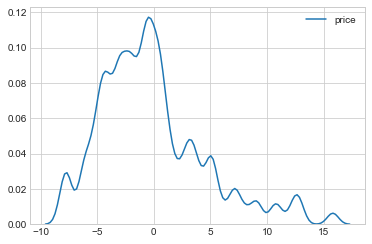

In [21]:
ydelta = ytest - pred
import seaborn as s
s.set_style("whitegrid")
s.kdeplot(ydelta,bw=0.5)

Distribution of Predicted prices and Actual prices

Text(0.5,0,'Prices')

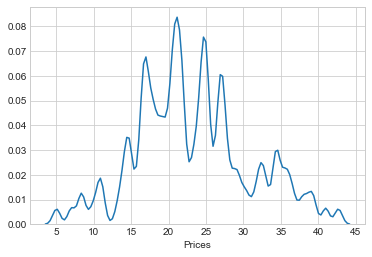

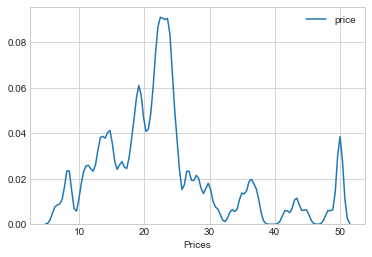

In [22]:
mp.figure(211)
s.kdeplot(pred,bw=0.5)
mp.xlabel("Prices")
mp.figure(212)
s.kdeplot(ytest,bw=0.5)
mp.xlabel("Prices")

Observation:
    
    -> The actual values have spread between 3 and 44
    
    -> The predicted values have spread between 3 and 53
    
    -> The error distribution have more negative skewness, this means that the model is preiciting 
        more than the actual values
        
    -> I have used R-Squared as the performance measure which resulted in 62.1 percent

Linear Regression with Stochastic Gradient Descent Optimization

In [784]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(379, 13)
(127, 13)
(379,)
(127,)


Scaling the features

In [785]:
scale  =StandardScaler()

In [786]:
xtrain = scale.fit_transform(xtrain)
xtest = scale.fit_transform(xtest)

In [787]:
from sklearn.linear_model import SGDRegressor

In [788]:
from sklearn import linear_model

SGD with learning rate 1 and number of iterations = 1

In [866]:
sgdr = SGDRegressor(alpha=1,n_iter=1,loss='squared_loss')
sgdr.fit(xtrain,ytrain)
pred = sgdr.predict(xtest)
score = r2_score(pred,ytest)*100
print(score)

-289.8165364388144


C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGD with learning rate 0.5 and number of iterations = 2

In [867]:
sgdr = SGDRegressor(alpha=0.5,n_iter=2,random_state=1,loss='squared_loss')
sgdr.fit(xtrain,ytrain)
pred = sgdr.predict(xtest)
score = r2_score(pred,ytest)*100
print(score)

-18.481088609809902


C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGD with learning rate 0.25 and number of iterations = 3

In [868]:
sgdr = SGDRegressor(alpha=0.25,n_iter=3,random_state=2,loss='squared_loss')
sgdr.fit(xtrain,ytrain)
pred = sgdr.predict(xtest)
score = r2_score(pred,ytest)*100
print(score)

28.60078816790762


C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGD with learning rate 0.12 and number of iterations = 4

In [869]:
sgdr = SGDRegressor(alpha=0.12,n_iter=4,random_state=3,loss='squared_loss')
sgdr.fit(xtrain,ytrain)
pred = sgdr.predict(xtest)
score = r2_score(pred,ytest)*100
print(score)

55.000206266037296


C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [ ]:
SGD with learning rate 0.06 and number of iterations = 5

In [870]:
sgdr = SGDRegressor(alpha=0.06,n_iter=5,random_state=4,loss='squared_loss')
sgdr.fit(xtrain,ytrain)
pred = sgdr.predict(xtest)
score = r2_score(pred,ytest)*100
print(score)

53.57293449043019


C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGD with learning rate 0.03 and number of iterations = 6

In [871]:
sgdr = SGDRegressor(alpha=0.03,n_iter=6,random_state=5,loss='squared_loss')
sgdr.fit(xtrain,ytrain)
pred = sgdr.predict(xtest)
score = r2_score(pred,ytest)*100
print(score)

62.04614151659265


C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGD with learning rate 0.02 and number of iterations = 7

In [872]:
sgdr = SGDRegressor(alpha=0.02,n_iter=7,random_state=6,loss='squared_loss')
sgdr.fit(xtrain,ytrain)
pred = sgdr.predict(xtest)
score = r2_score(pred,ytest)*100
print(score)

64.54798575686078


C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGD with learning rate 0.01 and number of iterations = 8

In [873]:
sgdr = SGDRegressor(alpha=0.01,n_iter=8,random_state=7,loss='squared_loss')
sgdr.fit(xtrain,ytrain)
pred = sgdr.predict(xtest)
score = r2_score(pred,ytest)*100
print(score)

59.081650022913855


C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Observation:
    
    By trying different combinations of Learning rates and Number of Iterations we can see that by 
    increasing learning rate from 0.02 there is decreasing in the performance score

In [833]:
print(pred.shape)
print(ytest.shape)

(127,)
(127,)


In [834]:
print(type(ytest))
print(type(pred))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


Mean difference between the Actual price and Predicted price

In [836]:
print(ytest.mean())
print(pred.mean())

23.09448818897638
22.22302364393628


In [837]:
t = pd.DataFrame(data=pred)

Median difference between Actual price and Predicted price

In [840]:
print(ytest.median())
print(t.median())


22.0
0    22.417535
dtype: float64


In [841]:
print(ytest.std())
print(pred.std())

9.992229576951791
7.421183114166382


In [842]:
import numpy as np

In [843]:
print(np.sum(ytest))
print(np.sum(pred))


2933.0
2822.3240027799075


Weight of the features from the Model

In [844]:
sgdr.coef_

array([-0.76933981,  0.70170576, -0.2440426 ,  0.68822587, -1.30061069,
        2.44441636, -0.16806442, -2.07190516,  0.89617887, -0.31317425,
       -1.8610315 ,  0.6094922 , -3.57303014])

-> Error is the difference between the Actual prices and Predicted prices


In [852]:
error = ytest-pred
print(error.max())
print(error.min())
print(np.sum(error))

16.91771118510735
-7.495529208285134
110.67599722009287


Observation:
    
    The maximun error is 16.9177
    
    The minimum error is -7.45
    
    The sum of all the errors is 110.67599

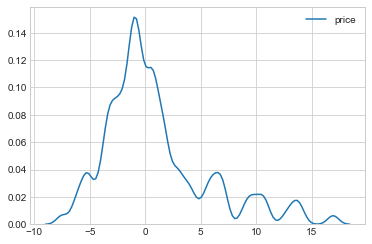

In [853]:
s.kdeplot(error,bw=0.5)

In [854]:
sgdr.intercept_

array([22.22302364])

Distribution of Errors

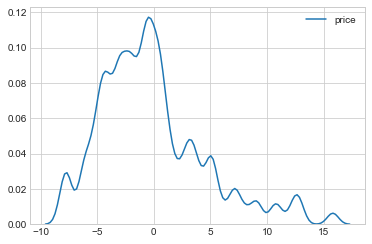

In [855]:
import seaborn as s
s.set_style("whitegrid")
s.kdeplot(ydelta,bw=0.5)

Distribution of Predicted prices and Actual prices

Text(0.5,1,'Actual prices')

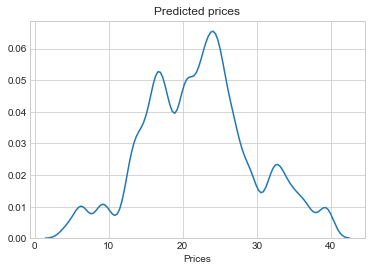

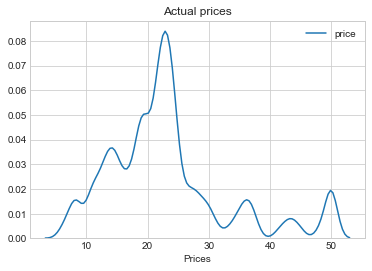

In [859]:
mp.figure(211)
s.kdeplot(pred,bw=1)
mp.xlabel("Prices")
mp.title("Predicted prices")
mp.figure(212)
s.kdeplot(ytest,bw=1)
mp.xlabel("Prices")
mp.title("Actual prices")

Observation:
    
    Both the predicted prices and actual prices have more spread in the region of 10 and 30

Conclusion:
    
    -> The best performance measure for regression model is R-Squared
    
    -> The value of R-Square in the range of 0 to 1 is a good model
    
    -> If the R-Square value is equal to zero then the model is simple mean model
    
    -> If R-Square value is negative then the model is performing very bad
    
    -> By using simple Linear Regression we got R-Square value as 0.62
    
    -> By using Stochastic Gradient Descent with different combination of learning rates and 
    
       number of iterations we got the best R-Square value as 0.645